# CSE 5243 - Introduction to Data Mining
## Homework 4: Clustering
- Semester: Autumn 2020
- Instructor: Tom Bihari
- Section: Tuesday/Thursday 9:35AM
- Student Name: Bianca Dizon
- Student Email: dizon.11@osu.edu
- Student ID: 500126259

Template Version V1.
***

**Instructions and Helpful Hints:**
- Consider putting all of your "discussion" text in markdown cells, not inline with code. That gives you more control over formatting. Markdown cheat sheet: https://www.markdownguide.org/cheat-sheet
- Explain what you are doing, and why.  Explain what you found out or learned.
- *Make sure you run your entire workbook before handing it in, so the output cells are populated.*
- Follow the Section structure as much as possible - put your content where it is requested, so we can find your answers.
- If you have questions on expectations or need clarification or guidance, please ask.  Post to Piazza if it is a general question, so everyone benefits.

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

***
- The objective of this assignment is to evaluate off-the-shelf clustering algorithms based on the characteristics of the datasets given and the outcomes needed. This assignment is for exploring how to tune and evaluate a clustering algorithm for the best performance. The three datasets that will be evaluated using the clustering algorithms are two-dimensional. They vary in size from 100 records in the file small_Xydf.csv to 2000 records in both the file large1_Xydf.csv and file large2_Xydf.csv
**

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [308]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestCentroid
from time import process_time
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 

***
# Section: 1 - Evaluate the **K-Means** Algorithm on the **Small** Dataset
***

***
## Section: 1.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS, the between-cluster BSS, and the overall SSE.
***

In [238]:
# read in from small_Xydf.csv
small_df= pd.read_csv('small_Xydf.csv')
# print(small_df)

# get column values from small_Xydf.csv
small_x = small_df[['X0','X1']].to_numpy()
# print(small_x[0])
small_y = small_df['y'].to_numpy()
# print(small_y[0])

# find nearest centroid
# def find_centroids(x_values, y_values):
#     clf = NearestCentroid()
#     clf.fit(x_values, y_values)
# #     print(clf.classes_)
# #     print(clf.centroids_)
#     return clf.centroids_
# find centroids for each cluster

def find_centroids(x_values, y_values):
    (unique, counts) =  np.unique(y_values, return_counts = True)
    freq = np.asarray((unique, counts)).T
#     print(len(freq))
    centroids = [0] * (len(freq))
#     centroids[0] = [1,2]
    sum_points = [0] * (len(freq))
    num_points = [0] * (len(freq))
#     print(centroids)
    for i in range(len(y_values)):
        for j in range(len(freq)):
            if y_values[i] == j:
                sum_points[j] += x_values[i]
                num_points[j] += 1
#     print(sum_points)
#     print(num_points)
    for i in range(len(num_points)):
        centroids[i] = sum_points[i] / num_points[i]
#     print(centroids)
    return centroids
small_centroids = find_centroids(small_x, small_y)
print("Centroids of clusters in small_Xydf.csv (in order from 0-2):")
print(small_centroids)
print()
# dist = np.linalg.norm(small_x[0]-small_centroids[0])
# print(dist)
# caculate WSS
def WSS(x_values, y_values, centroids):
    sum_dist = 0
    for i in range(len(y_values)):
        for j in range(len(centroids)):
            if y_values[i] == j:
#                 dist = np.linalg.norm(x_values[i]-centroids[j])
                dist = ((x_values[i][0]-centroids[j][0])**2) + ((x_values[i][1]-centroids[j][1])**2)
                sum_dist += dist
#     print(sum_dist)
    return sum_dist

small_wss = WSS(small_x, small_y, small_centroids)
print("WSS of clusters in small_Xydf.csv:")
print(small_wss)
print()


Centroids of clusters in small_Xydf.csv (in order from 0-2):
[array([-1.2826031 ,  4.26794777]), array([-10.10099235,  -3.76573335]), array([-6.09905354, -8.19155868])]

WSS of clusters in small_Xydf.csv:
625.1315700468003



In [239]:
def BSS(x_values, y_values):
    bss = 0
    bss_array = 0
    mean_all = 0
    (unique, counts) =  np.unique(y_values, return_counts = True)
    freq = np.asarray((unique, counts)).T
    mean_clusters = [0] * len(freq)
    num_pts = [0] * len(freq)
    errors = [0] * len(freq)
    for i in range(len(y_values)):
        mean_all += x_values[i]
        for j in range(len(freq)):
            if y_values[i] == j:
                mean_clusters[j] += x_values[i]
                num_pts[j] += 1
    mean_all = mean_all / len(y_values)
#     print(mean_all)
    for i in range(len(freq)):
        mean_clusters[i] = mean_clusters[i] / num_pts[i]
#     print(mean_clusters)
    for i in range(len(freq)):
        errors[i] = (mean_all-mean_clusters[i])**2
#     print(errors)
    for i in range(len(freq)):
        bss_array += (num_pts[i])*errors[i]
#     print(bss_array)
    for i in range(len(bss_array)):
        bss += bss_array[i]
#     print(bss)
    return bss
small_bss = BSS(small_x,small_y)
print("BSS of clusters in small_Xydf.csv:")
print(small_bss)
print()

def SSE(wss, bss):
    return wss + bss
print("SSE of clusters in small_Xydf.csv:")
small_sse = SSE(small_wss, small_bss)
print(small_sse)

BSS of clusters in small_Xydf.csv:
3986.441329795858

SSE of clusters in small_Xydf.csv:
4611.572899842658


***
## Section: 1.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run, compute the within-cluster WSS, the between-cluster BSS, and the overall SSE, and compute the running time.
***

***
### Parameter Configurations ###
- init='k-means++': This was chosen so cluster centers can be selected in a smart way to speed up convergence. Random initialization can be unlucky and choose nearby centers.
- n_init = 100: This large number of times the k-means algorithm is run will hopefully yield the best centroid seeds in comparison to a lesser number like 50.
- max_iter = 500: Maximum number of iterations of the k-means algorithm for a single run will be 500. A larger maximum number of iterations might yield a better k-means prediction.
- tol = 1e-04: A small relative tolerance with regard to the changes in the within-cluster sum-squared-error will be used for convergence. This is to make sure k-means convergences when the changes in WSS is small enough.
- random_state = 0: This parameter determines the random number generation for centroid initialization. It yields the same result across different calls, but it may be worhtwhile to check the results are stable across different random seeds.

Elapsed time: 0.28125
WSS for K=2: 1212.5883972546321
BSS for K=2: 3398.9845025880263
SSE for K=2: 4611.572899842658


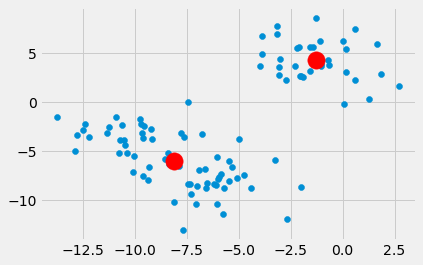

In [240]:
# K = 2
t_start = process_time()
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=100, max_iter=500, tol=1e-04, random_state=0)
pred_y = kmeans.fit_predict(small_x)
centroids = kmeans.cluster_centers_
t_stop = process_time()

print("Elapsed time:", t_stop-t_start)

wss = WSS(small_x, pred_y, centroids)
print("WSS for K=2:",wss)
bss = BSS(small_x, pred_y)
print("BSS for K=2:",bss)
sse = SSE(wss, bss)
print("SSE for K=2:",sse)

# print points and cluster centers
plt.scatter(small_x[:,0], small_x[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

Elapsed time: 0.5
WSS for K=3: 616.5037785142408
BSS for K=3: 3995.069121328418
SSE for K=3: 4611.572899842658


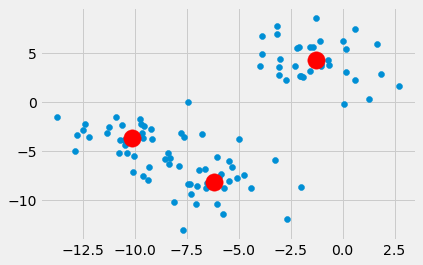

In [241]:
# K = 3
t_start = process_time()
kmeans3 = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=500, tol=1e-04, random_state=0)
pred_y3 = kmeans3.fit_predict(small_x)
centroids = kmeans3.cluster_centers_
t_stop = process_time()

print("Elapsed time:", t_stop-t_start)

wss = WSS(small_x, pred_y3, centroids)
print("WSS for K=3:", wss)
bss = BSS(small_x, pred_y3)
print("BSS for K=3:", bss)
sse = SSE(wss, bss)
print("SSE for K=3:", sse)

# print points and cluster centers
plt.scatter(small_x[:,0], small_x[:,1])
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s=300, c='red')
plt.show()

Elapsed time: 0.59375
WSS for K=4: 515.2170844984328
BSS for K=4: 4096.355815344226
SSE for K=4: 4611.572899842659


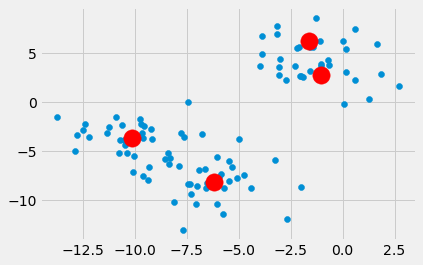

In [242]:
# K = 4
t_start = process_time()
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=100, max_iter=500, tol=1e-04, random_state=0)
pred_y = kmeans.fit_predict(small_x)
centroids = kmeans.cluster_centers_
t_stop = process_time()

print("Elapsed time:", t_stop-t_start)

wss = WSS(small_x, pred_y, centroids)
print("WSS for K=4:", wss)
bss = BSS(small_x, pred_y)
print("BSS for K=4:",bss)
sse = SSE(wss, bss)
print("SSE for K=4:",sse)

# print points and cluster centers
plt.scatter(small_x[:,0], small_x[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

***
## Section: 1.3 - For the K=3 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

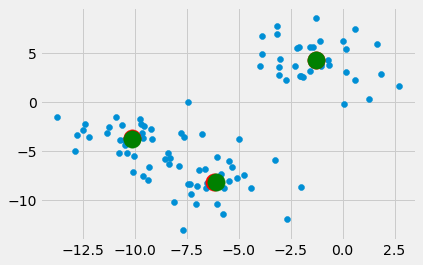

In [243]:
# scatterplot
plt.scatter(small_x[:,0], small_x[:,1])
# print(kmeans.cluster_centers_)
small_centroids = np.array(small_centroids)
# print(small_centroids)
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s=300, c='red')
plt.scatter(small_centroids[:, 0], small_centroids[:, 1], s=300, c='green')
plt.show()

In [245]:
# confusion matrix
print("Confusion Matrix:")
cmtx = pd.DataFrame(
    confusion_matrix(small_y, pred_y3, labels=[0,1,2]), 
    index=['true:0', 'true:1', 'true:2'], 
    columns=['pred:0', 'pred:1', 'pred:2']
)
print(cmtx)
print()
print("Classification Report:")
class_report = classification_report(small_y, pred_y3)
print(class_report)

Confusion Matrix:
        pred:0  pred:1  pred:2
true:0       0      34       0
true:1       1       0      32
true:2      33       0       0

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      34.0
           1       0.00      0.00      0.00      33.0
           2       0.00      0.00      0.00      33.0

    accuracy                           0.00     100.0
   macro avg       0.00      0.00      0.00     100.0
weighted avg       0.00      0.00      0.00     100.0



***
## Section: 1.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

### Observations
- I observed that the WSS decreased when the number of clusters, K, increased. This makes sense since WSS measures the within-cluster distance between the points included in the cluster and the cluster centroids. I also noticed that BSS increased as the number of clusters increased. This makes sense since BSS measures the between-cluster distances of all the clusters. The overall SSE did not change since the points in all the clusters, regardless of number of clusters, is the same through out.
- My preferred clustering K-value for this dataset in particular is K=3. The clusters visually makes sense. Additionally, using the elbow method (as can be seen below), determined that the optimal value of K is 3. The average distortion will decrease as the value of K increases. The point where this distortion declines the most is the elbow point. As can be seen in the plot below, the elbow is forming at K=3, so the optimal value for K for the small dataset is 3.


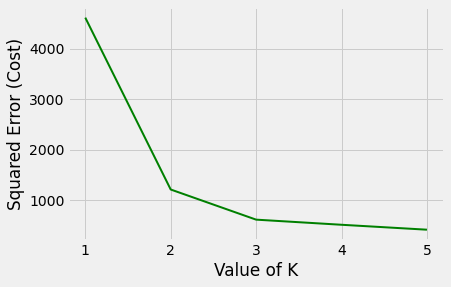

In [246]:
# elbow method to determine the optimal value of K 
def elbow(x_values, k1, kmax):
    cost =[] 
    for i in range(k1, kmax): 
        KM = KMeans(n_clusters = i, max_iter = 500) 
        KM.fit(x_values) 

        # calculates squared error 
        # for the clustered points 
        cost.append(KM.inertia_)      

    # plot the cost against K values 
    plt.plot(range(k1, kmax), cost, color ='g', linewidth ='2') 
    plt.xlabel("Value of K") 
    plt.ylabel("Squared Error (Cost)") 
    plt.show() # clear the plot 
    return

elbow(small_x,1,6)

***
# Section: 2 - Evaluate the **K-Means** Algorithm on the **Large1** Dataset
***

***
## Section: 2.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS, the between-cluster BSS, and the overall SSE.
***

In [249]:
# read in from large1_Xydf.csv
large1_df= pd.read_csv('large1_Xydf.csv')

# get column values from large1_Xydf.csv
large1_x = large1_df[['X0','X1']].to_numpy()
large1_y = large1_df['y'].to_numpy()

# find centroids
large1_centroids = find_centroids(large1_x, large1_y)
print("Centroids of clusters in large1_Xydf.csv'):",large1_centroids)
print()

# calculate WSS
large1_wss = WSS(large1_x, large1_y, large1_centroids)
print("WSS of clusters in large1_Xydf.csv:", large1_wss)


Centroids of clusters in large1_Xydf.csv'): [array([-1.6315723 ,  4.47589252]), array([-9.95411015, -3.94706155]), array([-6.9803202 , -8.06242865]), array([-6.2964076 , -3.13033436]), array([-2.07963472,  0.76933663]), array([-1.63966768,  3.68864241]), array([-5.93615174,  7.61293255]), array([-9.41984957,  3.36817233])]

WSS of clusters in large1_Xydf.csv: 3972.315387929949


In [250]:
large1_bss = BSS(large1_x,large1_y)
print("BSS of clusters in large1_Xydf.csv:",large1_bss)
print()

large1_sse = SSE(large1_wss, large1_bss)
print("SSE of clusters in large1_Xydf.csv:",large1_sse)

BSS of clusters in large1_Xydf.csv: 67712.28953700385

SSE of clusters in large1_Xydf.csv: 71684.6049249338


***
## Section: 2.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=6, 8, 10.
- For each run, compute the within-cluster WSS, the between-cluster BSS, and the overall SSE, and compute the running time.
***

### Parameter Configurations ###
- init='k-means++': This was chosen so cluster centers can be selected in a smart way to speed up convergence. Random initialization can be unlucky and choose nearby centers.
- n_init = 100: This large number of times the k-means algorithm is run will hopefully yield the best centroid seeds in comparison to a lesser number like 50.
- max_iter = 500: Maximum number of iterations of the k-means algorithm for a single run will be 500. A larger maximum number of iterations might yield a better k-means prediction.
- tol = 1e-04: A small relative tolerance with regard to the changes in the within-cluster sum-squared-error will be used for convergence. This is to make sure k-means convergences when the changes in WSS is small enough.
- random_state = 0: This parameter determines the random number generation for centroid initialization. It yields the same result across different calls, but it may be worhtwhile to check the results are stable across different random seeds.


Elapsed time: 2.96875
WSS for K=6: 5606.526295671683
BSS for K=6: 66078.0786292621
SSE for K=6: 71684.60492493378


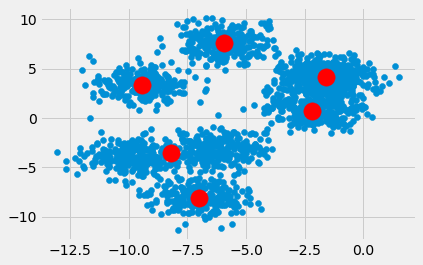

In [251]:
# K = 6
t_start = process_time()
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=100, max_iter=500, tol=1e-04, random_state=0)
pred_y = kmeans.fit_predict(large1_x)
centroids = kmeans.cluster_centers_
t_stop = process_time()

print("Elapsed time:", t_stop-t_start)

wss = WSS(large1_x, pred_y, centroids)
print("WSS for K=6:",wss)
bss = BSS(large1_x, pred_y)
print("BSS for K=6:",bss)
sse = SSE(wss, bss)
print("SSE for K=6:",sse)

# print points and cluster centers
plt.scatter(large1_x[:,0], large1_x[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

Elapsed time: 5.359375
WSS for K=8: 3549.1627261521908
BSS for K=8: 68135.49400272565
SSE for K=8: 71684.65672887785


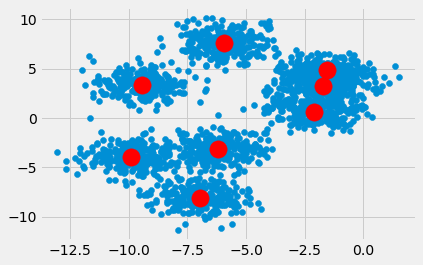

In [252]:
# K = 8
t_start = process_time()
kmeans8 = KMeans(n_clusters=8, init='k-means++', n_init=100, max_iter=500, tol=1e-04, random_state=0)
pred_y8 = kmeans8.fit_predict(large1_x)
centroids = kmeans8.cluster_centers_
t_stop = process_time()

print("Elapsed time:", t_stop-t_start)

wss = WSS(large1_x, pred_y8, centroids)
print("WSS for K=8:",wss)
bss = BSS(large1_x, pred_y8)
print("BSS for K=8:",bss)
sse = SSE(wss, bss)
print("SSE for K=8:",sse)

# print points and cluster centers
plt.scatter(large1_x[:,0], large1_x[:,1])
plt.scatter(kmeans8.cluster_centers_[:, 0], kmeans8.cluster_centers_[:, 1], s=300, c='red')
plt.show()

Elapsed time: 7.625
WSS for K=10: 3156.189174957795
BSS for K=10: 68528.56745406453
SSE for K=10: 71684.75662902232


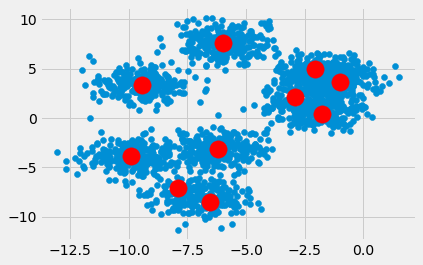

In [253]:
# K = 10
t_start = process_time()
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=100, max_iter=500, tol=1e-04, random_state=0)
pred_y = kmeans.fit_predict(large1_x)
centroids = kmeans.cluster_centers_
t_stop = process_time()

print("Elapsed time:", t_stop-t_start)

wss = WSS(large1_x, pred_y, centroids)
print("WSS for K=10:",wss)
bss = BSS(large1_x, pred_y)
print("BSS for K=10:",bss)
sse = SSE(wss, bss)
print("SSE for K=10:",sse)

# print points and cluster centers
plt.scatter(large1_x[:,0], large1_x[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

***
## Section: 2.3 - For the K=8 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

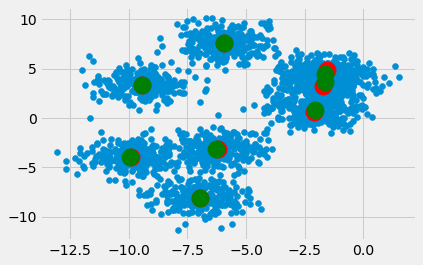

In [254]:
# scatterplot
plt.scatter(large1_x[:,0], large1_x[:,1])
# print(kmeans.cluster_centers_)
large1_centroids = np.array(large1_centroids)
# print(small_centroids)
plt.scatter(kmeans8.cluster_centers_[:, 0], kmeans8.cluster_centers_[:, 1], s=300, c='red')
plt.scatter(large1_centroids[:, 0], large1_centroids[:, 1], s=300, c='green')
plt.show()

In [255]:
# confusion matrix
print("Confusion Matrix:")
cmtx = pd.DataFrame(
    confusion_matrix(large1_y, pred_y8, labels=[0,1,2,3,4,5,6,7]), 
    index=['true:0', 'true:1', 'true:2','true:3', 'true:4', 'true:5','true:6', 'true:7'], 
    columns=['pred:0', 'pred:1', 'pred:2', 'pred:3', 'pred:4', 'pred:5', 'pred:6', 'pred:7']
)
print(cmtx)
print()
print("Classification Report:")
class_report = classification_report(large1_y, pred_y8)
print(class_report)

Confusion Matrix:
        pred:0  pred:1  pred:2  pred:3  pred:4  pred:5  pred:6  pred:7
true:0       1       0      83       0       0       0     165       1
true:1       0       2       0       1       0     247       0       0
true:2       0       3       0       0     246       1       0       0
true:3       0     237       0       0       0      12       0       1
true:4       0       0      20       0       0       0       1     229
true:5       0       0     155       0       0       0      89       6
true:6     249       0       0       0       0       0       1       0
true:7       1       0       0     249       0       0       0       0

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       250
           1       0.01      0.01      0.01       250
           2       0.00      0.00      0.00       250
           3       0.00      0.00      0.00       250
           4       0.00      0.00      0.00     

***
## Section: 2.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

### Observations
- I observed that the WSS decreased when the number of clusters, K, increased. This makes sense since WSS measures the within-cluster distance between the points included in the cluster and the cluster centroids. I also noticed that BSS increased as the number of clusters increased. This makes sense since BSS measures the between-cluster distances of all the clusters. The overall SSE did not change since the points in all the clusters, regardless of number of clusters, is the same through out.
- I observed that the WSS, BSS, and SSE for the large1 dataset are larger than the WSS, BSS, and SSE for the small dataset. This makes sense because there are more datapoints in large1 dataset and they are scattered throughout a bigger range of X0 and X1 values. I also observed that the time it took to run the k-means algorithm with all the same parameters on the large1 dataset was longer than it took to run the small dataset. This makes sense due to the fact that the dataset for large1 is much larger than the small dataset.
- My preferred clustering K-value for this dataset in particular is K=8. The clusters visually makes sense. Additionally, using the elbow method (as can be seen below) determined that the optimal value of K is 8. The average distortion will decrease as the value of K increases. The point where this distortion declines the most is the elbow point. As can be seen in the plot below, the elbow is forming at K=8, so the optimal value for K for the small dataset is 8.


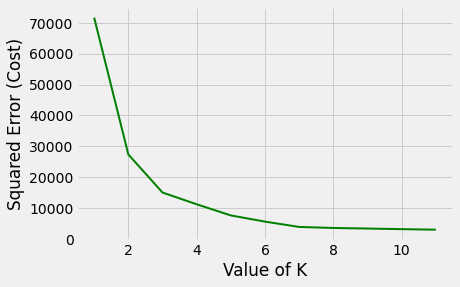

In [256]:
# elbow method to determine the optimal value of K 
elbow(large1_x,1,12)

***
# Section: 3 - Evaluate the **K-Means** Algorithm on the **Large2** Dataset
***

***
## Section: 3.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS, the between-cluster BSS, and the overall SSE.
***

In [257]:
# read in from large2_Xydf.csv
large2_df= pd.read_csv('large2_Xydf.csv')

# get column values from large2_Xydf.csv
large2_x = large2_df[['X0','X1']].to_numpy()
large2_y = large2_df['y'].to_numpy()

# find centroids
large2_centroids = find_centroids(large2_x, large2_y)
print("Centroids of clusters in large2_Xydf.csv'):",large2_centroids)
print()

# calculate WSS
large2_wss = WSS(large2_x, large2_y, large2_centroids)
print("WSS of clusters in large2_Xydf.csv:", large2_wss)

Centroids of clusters in large2_Xydf.csv'): [array([-0.00105864,  0.63766021]), array([ 1.0055454 , -0.13033796])]

WSS of clusters in large2_Xydf.csv: 1277.6161624690662


In [258]:
large2_bss = BSS(large2_x,large2_y)
print("BSS of clusters in large1_Xydf.csv:",large2_bss)
print()

large2_sse = SSE(large2_wss, large2_bss)
print("SSE of clusters in large1_Xydf.csv:",large2_sse)

BSS of clusters in large1_Xydf.csv: 801.5364401177087

SSE of clusters in large1_Xydf.csv: 2079.152602586775


***
## Section: 3.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run, compute the within-cluster WSS, the between-cluster BSS, and the overall SSE, and compute the running time.
***

### Parameter Configurations ###
- init='k-means++': This was chosen so cluster centers can be selected in a smart way to speed up convergence. Random initialization can be unlucky and choose nearby centers.
- n_init = 100: This large number of times the k-means algorithm is run will hopefully yield the best centroid seeds in comparison to a lesser number like 50.
- max_iter = 500: Maximum number of iterations of the k-means algorithm for a single run will be 500. A larger maximum number of iterations might yield a better k-means prediction.
- tol = 1e-04: A small relative tolerance with regard to the changes in the within-cluster sum-squared-error will be used for convergence. This is to make sure k-means convergences when the changes in WSS is small enough.
- random_state = 0: This parameter determines the random number generation for centroid initialization. It yields the same result across different calls, but it may be worhtwhile to check the results are stable across different random seeds.


Elapsed time: 2.140625
WSS for K=2: 865.0022865346044
BSS for K=2: 1214.1503160521702
SSE for K=2: 2079.1526025867747


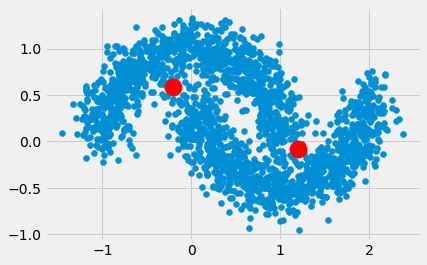

In [259]:
# K = 2
t_start = process_time()
kmeans2 = KMeans(n_clusters=2, init='k-means++', n_init=100, max_iter=500, tol=1e-04, random_state=0)
pred_y2 = kmeans2.fit_predict(large2_x)
centroids = kmeans2.cluster_centers_
t_stop = process_time()

print("Elapsed time:", t_stop-t_start)

wss = WSS(large2_x, pred_y2, centroids)
print("WSS for K=2:",wss)
bss = BSS(large2_x, pred_y2)
print("BSS for K=2:",bss)
sse = SSE(wss, bss)
print("SSE for K=2:",sse)

# print points and cluster centers
plt.scatter(large2_x[:,0], large2_x[:,1])
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=300, c='red')
plt.show()

Elapsed time: 6.3125
WSS for K=3: 590.2806638984845
BSS for K=3: 1488.8777070333765
SSE for K=3: 2079.158370931861


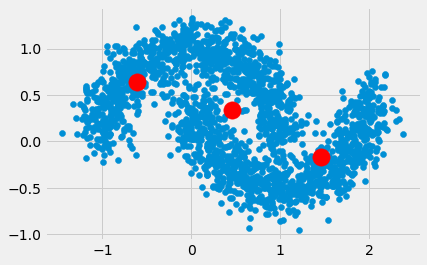

In [260]:
# K = 3
t_start = process_time()
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=500, tol=1e-04, random_state=0)
pred_y = kmeans.fit_predict(large2_x)
centroids = kmeans.cluster_centers_
t_stop = process_time()

print("Elapsed time:", t_stop-t_start)

wss = WSS(large2_x, pred_y, centroids)
print("WSS for K=3:",wss)
bss = BSS(large2_x, pred_y)
print("BSS for K=3:",bss)
sse = SSE(wss, bss)
print("SSE for K=3:",sse)

# print points and cluster centers
plt.scatter(large2_x[:,0], large2_x[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

Elapsed time: 5.09375
WSS for K=4: 392.6730104505292
BSS for K=4: 1686.4817261702242
SSE for K=4: 2079.1547366207533


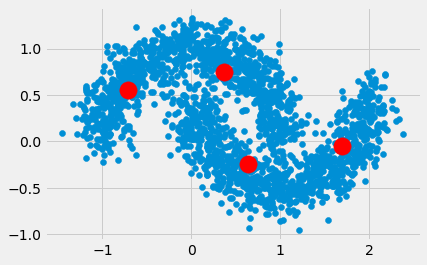

In [263]:
# K = 4
t_start = process_time()
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=100, max_iter=500, tol=1e-04, random_state=0)
pred_y = kmeans.fit_predict(large2_x)
centroids = kmeans.cluster_centers_
t_stop = process_time()

print("Elapsed time:", t_stop-t_start)

wss = WSS(large2_x, pred_y, centroids)
print("WSS for K=4:",wss)
bss = BSS(large2_x, pred_y)
print("BSS for K=4:",bss)
sse = SSE(wss, bss)
print("SSE for K=4:",sse)

# print points and cluster centers
plt.scatter(large2_x[:,0], large2_x[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

***
## Section: 3.3 - For the K=2 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

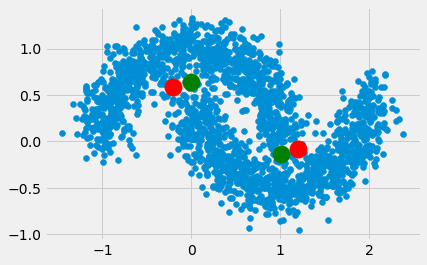

In [288]:
# scatterplot
plt.scatter(large2_x[:,0], large2_x[:,1])
# print(kmeans.cluster_centers_)
large2_centroids = np.array(large2_centroids)
# print(small_centroids)
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=300, c='red')
plt.scatter(large2_centroids[:, 0], large2_centroids[:, 1], s=300, c='green')
plt.show()

In [289]:
# confusion matrix
print("Confusion Matrix:")
cmtx = pd.DataFrame(
    confusion_matrix(large2_y, pred_y2, labels=[0,1]), 
    index=['true:0', 'true:1'], 
    columns=['pred:0', 'pred:1']
)
print(cmtx)
print()
print("Classification Report:")
class_report = classification_report(large2_y, pred_y2)
print(class_report)

Confusion Matrix:
        pred:0  pred:1
true:0     758     242
true:1     234     766

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1000
           1       0.76      0.77      0.76      1000

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



***
## Section: 3.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

### Observations
- I observed that the WSS decreased when the number of clusters, K, increased. This makes sense since WSS measures the within-cluster distance between the points included in the cluster and the cluster centroids. I also noticed that BSS increased as the number of clusters increased. This makes sense since BSS measures the between-cluster distances of all the clusters. The overall SSE did not change since the points in all the clusters, regardless of number of clusters, is the same through out.
- I observed that the WSS for the large2 dataset is smaller than the WSS for the large1 dataset and bigger than the WSS of small dataset. This makes sense because the range of the point values is smaller than the ranges of the large1 dataset, and the large2 dataset had more points than the small dataset which would account for the bigger WSS. The BSS and SSE values for large2 dataset are smaller than both the BSS and SSE's of the large1 dataset and the small dataset. This makes sense because the range of values of the points is smaller than both the ranges for the large1 dataset and the small dataset. I also observed that the time it took to run the k-means algorithm with all the same parameters on the large2 dataset was longer than it took to run the small dataset, but was shorter than the large1 dataset. This makes sense due to the fact that the dataset for large2 is much larger than the small dataset, and the large2 dataset has points that are more compact than large1 dataset's points.
- My preferred clustering K-value for this dataset in particular is K=2. The clusters visually makes sense. Additionally, using the elbow method (as can be seen below) determined that the optimal value of K is 2. The average distortion will decrease as the value of K increases. The point where this distortion declines the most is the elbow point. As can be seen in the plot below, the elbow is forming at K=2, so the optimal value for K for the small dataset is 2.

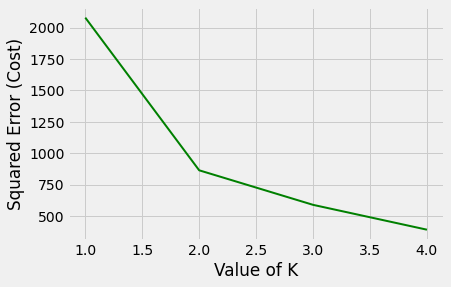

In [265]:
# elbow method to determine the optimal value of K 
elbow(large2_x,1,5)

***
# Section: 4 - Evaluate a **Second** Clustering Algorithm on the **Large2** Dataset
***

***
## Section: 4.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
***

### Spectral Clustering
- I chose the spectral clustering algorithm for the large2 dataset because the scalability of this algorithm works best with medium number of samples and small number clusters. In the previous section, it is evident that K=2 clusters is best for the large2 dataset. The dataset has medium number of samples. Additionally, from the sci-kit learn website chart, it is evident that the spectral clustering algorithm is among the best for datasets that visually look like the large2 dataset.

***
## Section: 4.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For Each Run:
1. Compute the within-cluster WSS, the between-cluster BSS, and the overall SSE, and compute the running time.
2. Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
3. Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

### 1st Variation Parameters 
- n_clusters = 2: This number of clusters was the best for the large2 dataset.
- affinity = 'rbf':This parameter constructs the affinity matrix using a radial basis function kernel.

### 2nd Variation Parameters
- n_clusters = 2: This number of clusters was the best for the large2 dataset.
- affinity = 'neares_neighbors': This parameter constructs the affinity matrix by selecting the neares neighbors

Elapsed time: 1.0
WSS: 4815.080113335759
BSS: 1212.0858707891005
SSE: 6027.165984124859
Scatter Plot for Spectral RBF


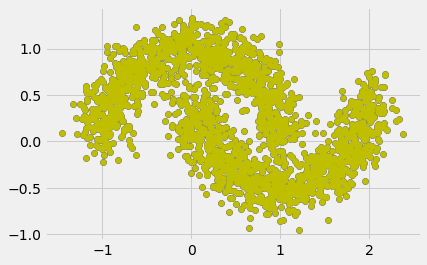

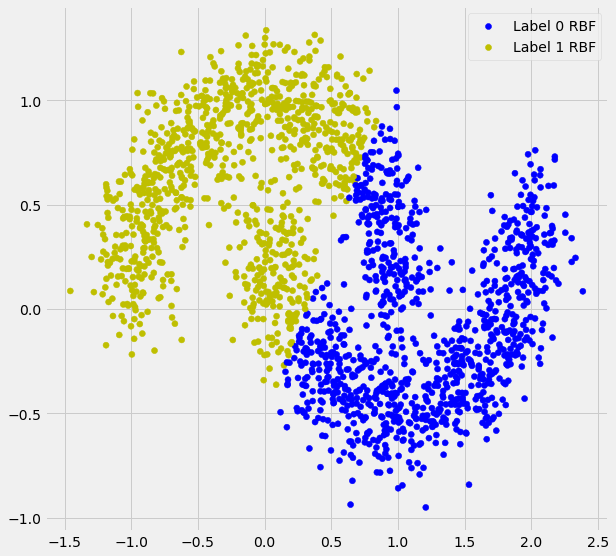

Scatter Plot for ACTUAL


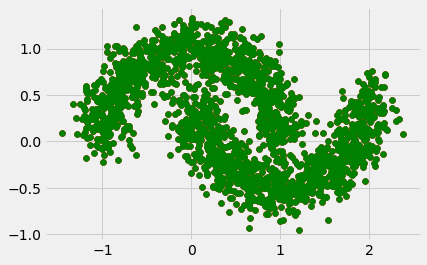

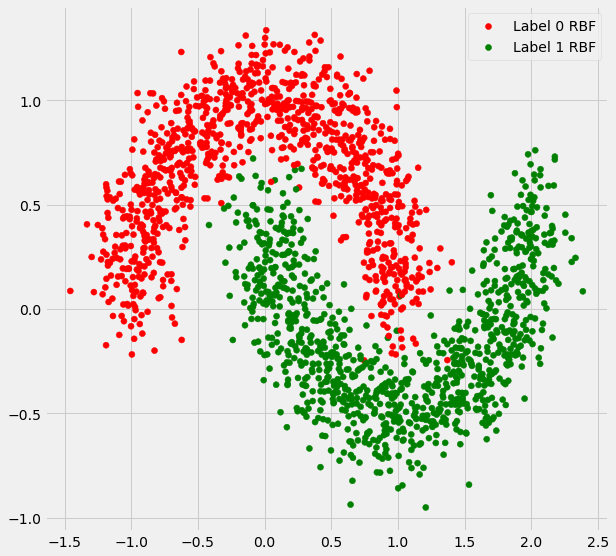

In [297]:
# 1ST VARIATION: rbf
# Building the clustering model 
t_start = process_time()
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf') 
  
# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(large2_x) 
t_stop = process_time()

print("Elapsed time:", t_stop-t_start)
wss = WSS(large2_x, labels_rbf, large2_centroids)
print("WSS:",wss)
bss = BSS(large2_x, labels_rbf)
print("BSS:",bss)
sse = SSE(wss, bss)
print("SSE:",sse)

# Building the label to colour mapping 
colours = {} 
colours[0] = 'b'
colours[1] = 'y'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels_rbf] 
  
# Plotting the clustered scatter plot 
  
b = plt.scatter(large2_x[:,0], large2_x[:,1], color ='b'); 
y = plt.scatter(large2_x[:,0], large2_x[:,1], color ='y'); 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(large2_x[:,0], large2_x[:,1], c = cvec) 
plt.legend((b, y), ('Label 0 RBF', 'Label 1 RBF')) 
print("Scatter Plot for Spectral RBF")
plt.show() 

# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
  
# Building the colour vector for each data point 
cvecs = [colours[label] for label in large2_y] 
  
# Plotting the clustered scatter plot 
  
r = plt.scatter(large2_x[:,0], large2_x[:,1], color ='r'); 
g = plt.scatter(large2_x[:,0], large2_x[:,1], color ='g'); 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(large2_x[:,0], large2_x[:,1], c = cvecs) 
plt.legend((r, g), ('Label 0 RBF', 'Label 1 RBF')) 
print("Scatter Plot for ACTUAL")
plt.show() 

In [298]:
# confusion matrix
print("Confusion Matrix:")
cmtx = pd.DataFrame(
    confusion_matrix(large2_y, labels_rbf, labels=[0,1]), 
    index=['true:0', 'true:1'], 
    columns=['pred:0', 'pred:1']
)
print(cmtx)
print()
print("Classification Report:")
class_report = classification_report(large2_y, labels_rbf)
print(class_report)

Confusion Matrix:
        pred:0  pred:1
true:0     239     761
true:1     787     213

Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.24      0.24      1000
           1       0.22      0.21      0.22      1000

    accuracy                           0.23      2000
   macro avg       0.23      0.23      0.23      2000
weighted avg       0.23      0.23      0.23      2000



Elapsed time: 0.96875
WSS: 946.0935424998273
BSS: 1212.0276780958363
SSE: 2158.1212205956635
Scatter Plot for Spectral RBF


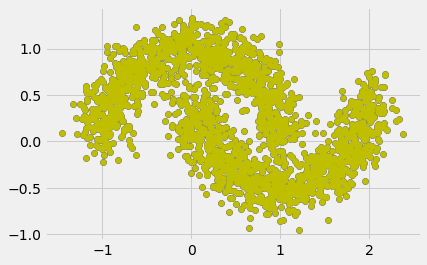

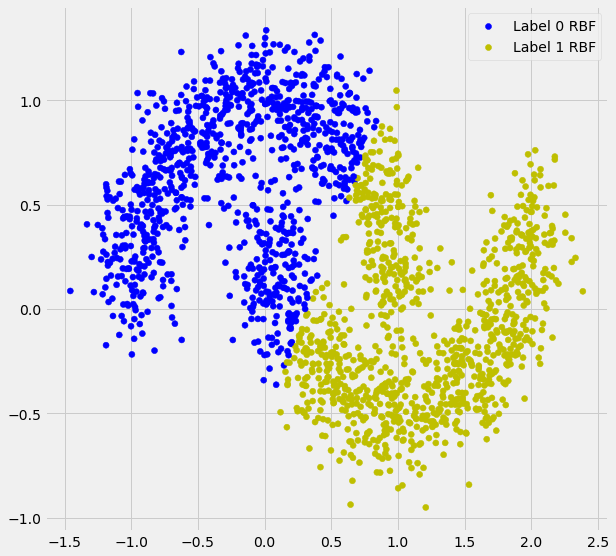

Scatter Plot for ACTUAL


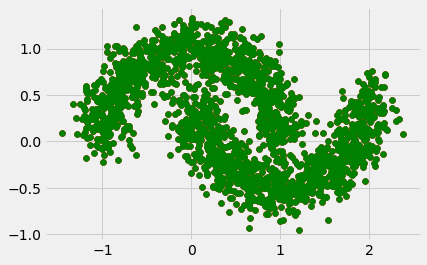

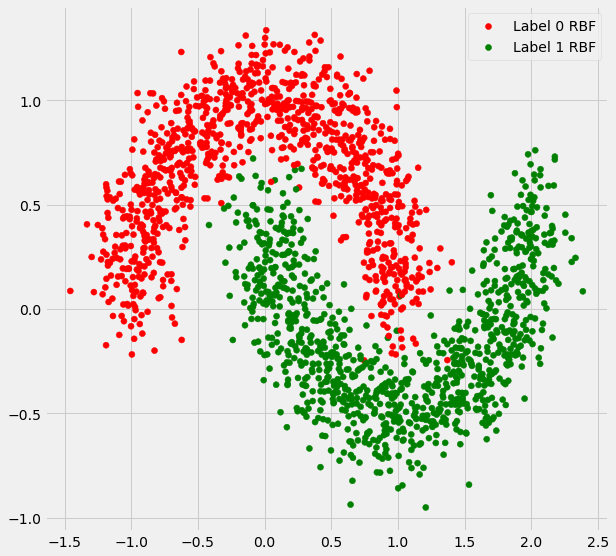

In [296]:
# 2nd VARIATION: n-nearest
# Building the clustering model 
t_start = process_time()
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') 
  
# Training the model and Storing the predicted cluster labels 
labels_nn = spectral_model_rbf.fit_predict(large2_x) 
t_stop = process_time()

print("Elapsed time:", t_stop-t_start)
wss = WSS(large2_x, labels_nn, large2_centroids)
print("WSS:",wss)
bss = BSS(large2_x, labels_nn)
print("BSS:",bss)
sse = SSE(wss, bss)
print("SSE:",sse)

# Building the label to colour mapping 
colours = {} 
colours[0] = 'b'
colours[1] = 'y'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels_nn] 
  
# Plotting the clustered scatter plot 
  
b = plt.scatter(large2_x[:,0], large2_x[:,1], color ='b'); 
y = plt.scatter(large2_x[:,0], large2_x[:,1], color ='y'); 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(large2_x[:,0], large2_x[:,1], c = cvec) 
plt.legend((b, y), ('Label 0 RBF', 'Label 1 RBF')) 
print("Scatter Plot for Spectral RBF")
plt.show() 

# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
  
# Building the colour vector for each data point 
cvecs = [colours[label] for label in large2_y] 
  
# Plotting the clustered scatter plot 
  
r = plt.scatter(large2_x[:,0], large2_x[:,1], color ='r'); 
g = plt.scatter(large2_x[:,0], large2_x[:,1], color ='g'); 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(large2_x[:,0], large2_x[:,1], c = cvecs) 
plt.legend((r, g), ('Label 0 RBF', 'Label 1 RBF')) 
print("Scatter Plot for ACTUAL")
plt.show() 

In [299]:
# confusion matrix
print("Confusion Matrix:")
cmtx = pd.DataFrame(
    confusion_matrix(large2_y, labels_nn, labels=[0,1]), 
    index=['true:0', 'true:1'], 
    columns=['pred:0', 'pred:1']
)
print(cmtx)
print()
print("Classification Report:")
class_report = classification_report(large2_y, labels_nn)
print(class_report)

Confusion Matrix:
        pred:0  pred:1
true:0     762     238
true:1     213     787

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1000
           1       0.77      0.79      0.78      1000

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000



***
## Section: 4.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

### Observations
- I observed that the nearest-neighbors affinity for spectral clustering ran slightly faster than rbf. I also noticed that all the values of WSS, BSS, and SSE for rbf were less than the values for n-nearest affinity. 
- I prefer the n-nearest setting for spectral clustering since the accuracy, precision, recall, f1-score are higher than rbf's.


***
# Section: 5 - Evaluate a **Third** Clustering Algorithm on the **Large2** Dataset
***

***
## Section: 5.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
***

### Agglomerative Clustering
- I chose the Agglomerative clustering algorithm for the large2 dataset because the scalability of this algorithm works best with medium number of samples and small number clusters. In the previous section, it is evident that K=2 clusters is best for the large2 dataset. The dataset has medium number of samples. Additionally, from the sci-kit learn website chart, it is evident that the Agglomerative clustering algorithm is among the best for datasets that visually look like the large2 dataset.

***
## Section: 5.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For Each Run:
1. Compute the within-cluster WSS, the between-cluster BSS, and the overall SSE, and compute the running time.
2. Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
3. Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

### 1st Variation Parameters 
- n_clusters = 2: This number of clusters was the best for the large2 dataset.
- linkage= ward
- affinity = 'euclidean':This parameter constructs the affinity matrix using a eucliden distance.

### 2nd Variation Parameters
- n_clusters = 2: This number of clusters was the best for the large2 dataset.
- linkage = average
- affinity = 'manhattan': This parameter constructs the affinity using manhattan distance.

Elapsed time: 0.140625
WSS: 4378.874407963691
BSS: 1006.3983282049853
SSE: 5385.272736168676
Scatter Plot for Agglomerative Clustering


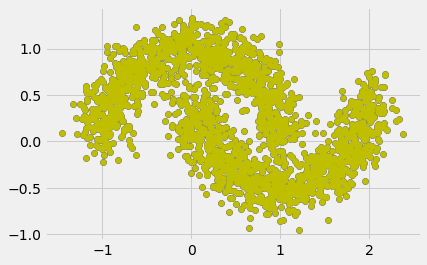

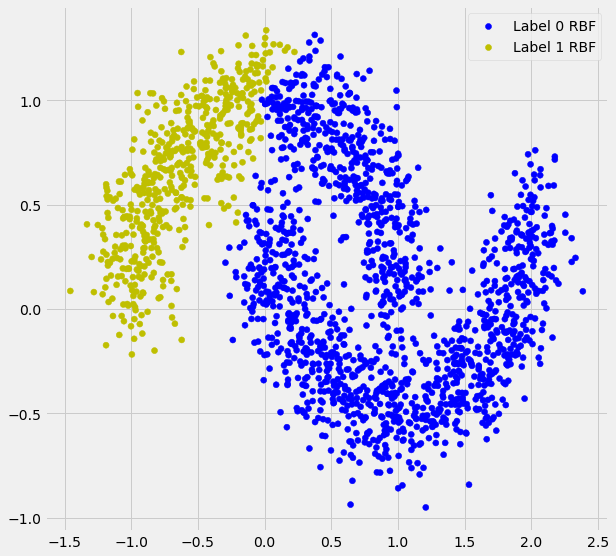

Scatter Plot for ACTUAL


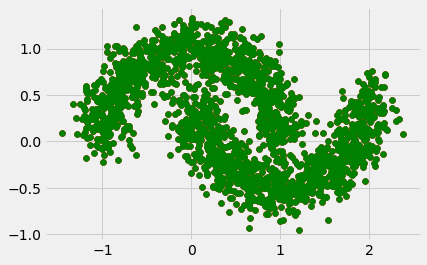

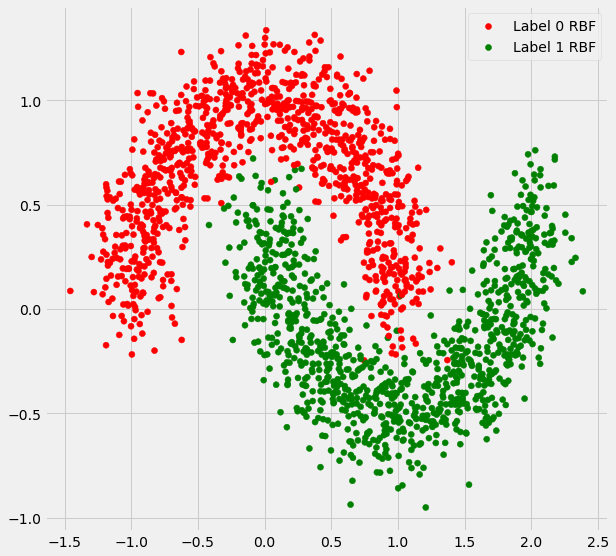

In [322]:
# Numpy array of all the cluster labels assigned to each data point 
t_start = process_time()
ac2 = AgglomerativeClustering(n_clusters = 2, affinity='euclidean') 
c = ac2.fit_predict(large2_x)
# print(c)
t_stop = process_time()

print("Elapsed time:", t_stop-t_start)
wss = WSS(large2_x, c, large2_centroids)
print("WSS:",wss)
bss = BSS(large2_x, c)
# bss = 0
print("BSS:",bss)
sse = SSE(wss, bss)
print("SSE:",sse)

# print("Scatter Plot for Agglomerative Clustering")
# # Visualizing the clustering 
# plt.figure(figsize =(6, 6)) 
# plt.scatter(large2_x[:,0], large2_x[:,1],  
#            c, cmap ='rainbow') 
# plt.show()

# # Visualizing the clustering 
# plt.figure(figsize =(6, 6)) 
# plt.scatter(large2_x[:,0], large2_x[:,1],  
#            large2_y, cmap ='rainbow') 
# plt.show()
# Building the label to colour mapping 
colours = {} 
colours[0] = 'b'
colours[1] = 'y'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in c] 
  
# Plotting the clustered scatter plot 
  
b = plt.scatter(large2_x[:,0], large2_x[:,1], color ='b'); 
y = plt.scatter(large2_x[:,0], large2_x[:,1], color ='y'); 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(large2_x[:,0], large2_x[:,1], c = cvec) 
plt.legend((b, y), ('Label 0 RBF', 'Label 1 RBF')) 
print("Scatter Plot for Agglomerative Clustering")
plt.show() 

# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
  
# Building the colour vector for each data point 
cvecs = [colours[label] for label in large2_y] 
  
# Plotting the clustered scatter plot 
  
r = plt.scatter(large2_x[:,0], large2_x[:,1], color ='r'); 
g = plt.scatter(large2_x[:,0], large2_x[:,1], color ='g'); 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(large2_x[:,0], large2_x[:,1], c = cvecs) 
plt.legend((r, g), ('Label 0 RBF', 'Label 1 RBF')) 
print("Scatter Plot for ACTUAL")
plt.show() 

In [323]:
# confusion matrix
print("Confusion Matrix:")
cmtx = pd.DataFrame(
    confusion_matrix(large2_y, c, labels=[0,1]), 
    index=['true:0', 'true:1'], 
    columns=['pred:0', 'pred:1']
)
print(cmtx)
print()
print("Classification Report:")
class_report = classification_report(large2_y, c)
print(class_report)

Confusion Matrix:
        pred:0  pred:1
true:0     489     511
true:1     991       9

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.49      0.39      1000
           1       0.02      0.01      0.01      1000

    accuracy                           0.25      2000
   macro avg       0.17      0.25      0.20      2000
weighted avg       0.17      0.25      0.20      2000



Elapsed time: 0.140625
WSS: 4541.149363059139
BSS: 1040.6416136119776
SSE: 5581.790976671117
Scatter Plot for Agglomerative Clustering Manhattan


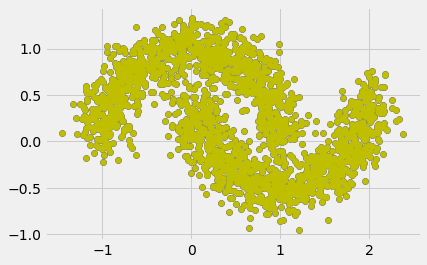

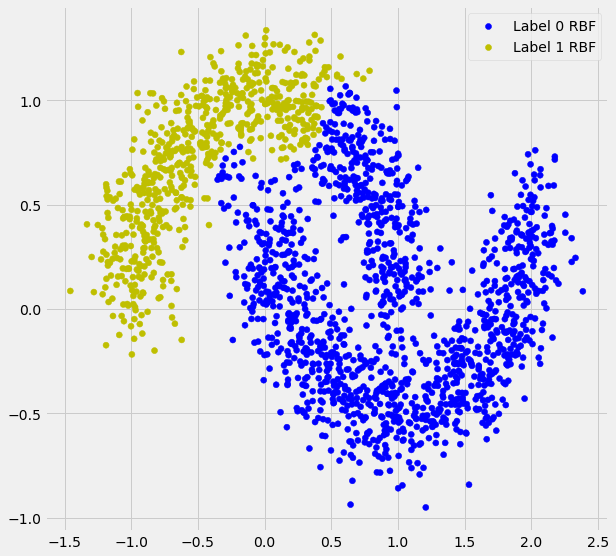

Scatter Plot for ACTUAL


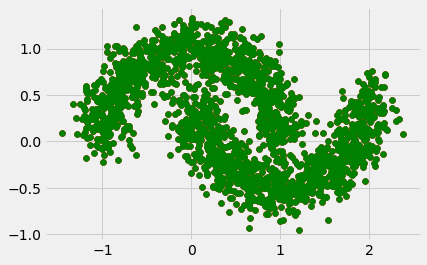

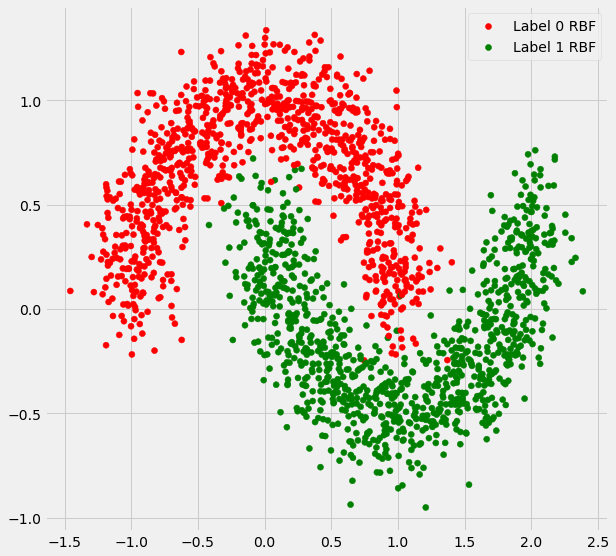

In [324]:
# Numpy array of all the cluster labels assigned to each data point 
t_start = process_time()
ac2 = AgglomerativeClustering(n_clusters = 2, linkage='average', affinity='manhattan') 
c = ac2.fit_predict(large2_x)
# print(c)
t_stop = process_time()

print("Elapsed time:", t_stop-t_start)
wss = WSS(large2_x, c, large2_centroids)
print("WSS:",wss)
bss = BSS(large2_x, c)
# bss = 0
print("BSS:",bss)
sse = SSE(wss, bss)
print("SSE:",sse)

# print("Scatter Plot for Agglomerative Clustering")
# # Visualizing the clustering 
# plt.figure(figsize =(6, 6)) 
# plt.scatter(large2_x[:,0], large2_x[:,1],  
#            c, cmap ='rainbow') 
# plt.show()

# # Visualizing the clustering 
# plt.figure(figsize =(6, 6)) 
# plt.scatter(large2_x[:,0], large2_x[:,1],  
#            large2_y, cmap ='rainbow') 
# plt.show()
# Building the label to colour mapping 
colours = {} 
colours[0] = 'b'
colours[1] = 'y'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in c] 
  
# Plotting the clustered scatter plot 
  
b = plt.scatter(large2_x[:,0], large2_x[:,1], color ='b'); 
y = plt.scatter(large2_x[:,0], large2_x[:,1], color ='y'); 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(large2_x[:,0], large2_x[:,1], c = cvec) 
plt.legend((b, y), ('Label 0 RBF', 'Label 1 RBF')) 
print("Scatter Plot for Agglomerative Clustering Manhattan")
plt.show() 

# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
  
# Building the colour vector for each data point 
cvecs = [colours[label] for label in large2_y] 
  
# Plotting the clustered scatter plot 
  
r = plt.scatter(large2_x[:,0], large2_x[:,1], color ='r'); 
g = plt.scatter(large2_x[:,0], large2_x[:,1], color ='g'); 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(large2_x[:,0], large2_x[:,1], c = cvecs) 
plt.legend((r, g), ('Label 0 RBF', 'Label 1 RBF')) 
print("Scatter Plot for ACTUAL")
plt.show() 

In [325]:
# confusion matrix
print("Confusion Matrix:")
cmtx = pd.DataFrame(
    confusion_matrix(large2_y, c, labels=[0,1]), 
    index=['true:0', 'true:1'], 
    columns=['pred:0', 'pred:1']
)
print(cmtx)
print()
print("Classification Report:")
class_report = classification_report(large2_y, c)
print(class_report)

Confusion Matrix:
        pred:0  pred:1
true:0     375     625
true:1     998       2

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.38      0.32      1000
           1       0.00      0.00      0.00      1000

    accuracy                           0.19      2000
   macro avg       0.14      0.19      0.16      2000
weighted avg       0.14      0.19      0.16      2000



***
## Section: 5.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

### Observations
- I observed that the manhattan affinity for agglomerative clustering ran as fast as euclidean. I also noticed that all the values of WSS, BSS, and SSE for euclidean were less than the values for manhattan affinity. 
- I prefer the euclidean setting for agglomerative clustering since the accuracy, precision, recall, and f1-score are higher than mahattans's.

***
# Section: 6 - Comparison of the Three Clustering Algorithms on the **Large2** Dataset
***

***
## Section: 6.1 - Compare Their Performance
- What was their relative performance (quality and timing), and their performance versus the true clustering?
- What characteristics of the data might impact the clustering algorithms' performance?
***

### Performance Comparison
- I am comparing the relative performances of the large2 dataset with k=2 for all the following clustering algorithms. I have concluded that spectral clustering with affinity=n-nearest and agglomerative clustering with affinity=euclidean were the best for each of their respective clustering methods. They will be compared below to k-means k=2.
- The best performance in regards to time is the agglomerative clustering with affinity = euclidean at 0.140 seconds. The time for spectral clustering affinity = n-nearest neighbors is 0.96 seconds. The time for k-means clustering is 2.14 seconds.
- The best performance in regards to performance is spectral clustering with affinity=n-nearest. I compared all the clustering algorithms using the precision and accuracy. Spectral clustering with affinity=n-nearest had the highest accuracy and precision. It is followed by k-means k=2, and then agglomerative clustering with affinity = euclidean.
- The dataset's characteristics like the number of data points and the number of clusters affect which clustering algorithms work best. Also, the shape of the dataset affects which algorithm should be used.

***
## Section: 6.2 - Choose a Best Clustering Algorithm
- Choose one of the three clustering algorithm as best and explain why.
***

### Best Clustering Algorithm
- The best clustering algorithm seems to be spectral clustering with affinity=n-nearest since it has the highest accuracy and precision and the time for it to run is pretty short at 0.96s. It yielded the closest clustering to the true clustering at a fast rate. It is also pretty easy to understand and set up using the sci-kit package.

***
# Section: 7 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

### Conclusions
- I discovered a few things about clustering working on this assignment. The first thing I realized is the number of data points in a data set affects the possible accuracy of a clustering algorithm. The more the data points, the more accurate it can be clustered. I learned that the number of clusters, or the value of k, is dependent on the shapes that can be found within the data points. It is important to test different k sizes to find the best k value. One way to do this is to test out different values of k. Another way is to use the elbow method to find the best number of clusters. The elbow method looks at the total WSS as a function of the number of clusters. The optimal k value can be found on an elbow line plot as the bend in the plot. Furthermore, I learned that there are differnt clustering algorithms that can be used depending on the size of the dataset, number of clusters, and shape of the dataset. For the large2 dataset, I found that using the spectral clustering algorithm wiht affinity=n-nearest with k=2 to be the most accurate and time efficient algorithm.

***
### END-OF-SUBMISSION
***